In [27]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [6]:
%reload_ext watermark 

In [21]:
%watermark -u -v -d -p matplotlib,numpy

last updated: 2019-11-18 

CPython 3.7.3
IPython 7.4.0

matplotlib 3.0.3
numpy 1.16.2


In [8]:
%matplotlib inline

# Bar plots in Matplotlib


# Bar plot with error bars

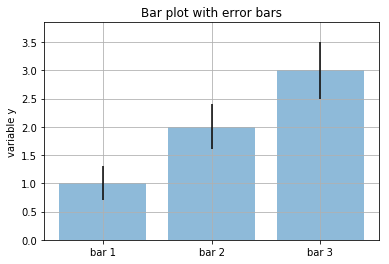

In [29]:
import matplotlib
import matplotlib.pyplot as plt # we can put graph on screen with the help of pyplot 

# input data
mean_values = [1, 2, 3]
variance = [0.3, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3'] # bar names

# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, mean_values, yerr=variance, align='center', alpha=0.5)

plt.grid()
# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('variable y')#array_like, optional
#A list of explicit labels to place at the given locs.

plt.xticks(x_pos, bar_labels)#array_like
#A list of positions at which ticks should be placed. 
#You can pass an empty list to disable xticks.


plt.title('Bar plot with error bars')

plt.show()
#plt.savefig('./my_plot.png')

In [10]:
plt.savefig('./my_plot.png')

<Figure size 432x288 with 0 Axes>

# Horizontal bar plot with error bars

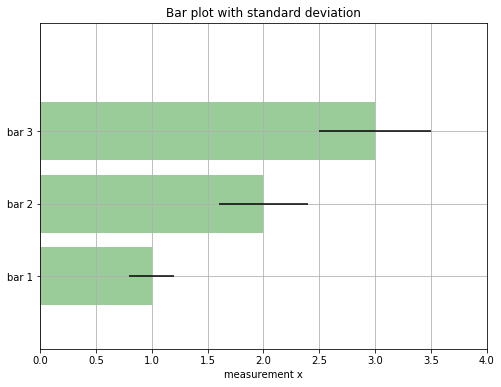

In [11]:
import numpy as np

# input data
mean_values = [1, 2, 3]
std_dev = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

fig = plt.figure(figsize=(8,6)) #(x,y)

# plot bars
y_pos = np.arange(len(mean_values))
y_pos = [x for x in y_pos]
plt.yticks(y_pos, bar_labels, fontsize=10)
plt.barh(y_pos, mean_values, xerr=std_dev, 
         align='center', alpha=0.4, color='g')

# annotation and labels
plt.xlabel('measurement x')
t = plt.title('Bar plot with standard deviation')
plt.ylim([-1,len(mean_values)+0.5])
plt.xlim([0, 4])
plt.grid()

plt.show()

# Back-to-back bar plot

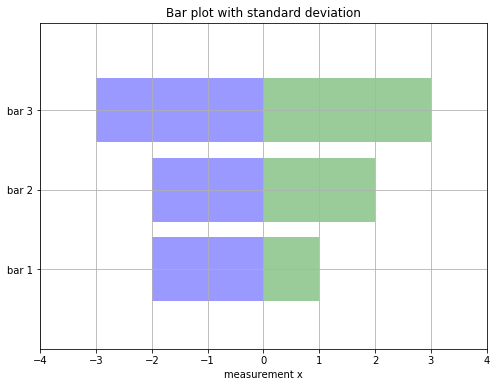

In [33]:
from matplotlib import pyplot as plt
import numpy as np

# input data
X1 = np.array([1, 2, 3])
X2 = np.array([2, 2, 3])


bar_labels = ['bar 1', 'bar 2', 'bar 3']

fig = plt.figure(figsize=(8,6))# columns=8,rows=6

# plot bars
y_pos = np.arange(len(X1))
y_pos = [x for x in np.arange(len(X1))]
plt.yticks(y_pos, bar_labels, fontsize=10)


plt.barh(y_pos, X1, 
         align='center', alpha=0.4, color='g')

# we simply negate the values of the numpy array for
# the second bar:
plt.barh(y_pos, -X2,
         align='center', alpha=0.4, color='b')

# annotation and labels
plt.xlabel('measurement x')
t = plt.title('Bar plot with standard deviation')
plt.ylim([-1,len(X1)+0.1])
plt.xlim([-max(X2)-1, max(X1)+1])
plt.grid()
plt.show()

# Grouped bar plot

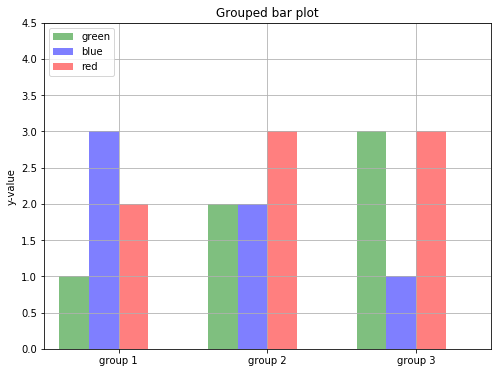

In [13]:
import matplotlib.pyplot as plt

# Input data
green_data = [1, 2, 3]
blue_data = [3, 2, 1]
red_data = [2, 3, 3]
labels = ['group 1', 'group 2', 'group 3']

# Setting the positions and width for the bars
pos = list(range(len(green_data))) 
width = 0.2 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(8,6))

plt.bar(pos, green_data, width,
                 alpha=0.5,
                 color='g',
                 label=labels[0])

plt.bar([p + width for p in pos], blue_data, width,
                 alpha=0.5,
                 color='b',
                 label=labels[1])
    
plt.bar([p + width*2 for p in pos], red_data, width,
                 alpha=0.5,
                 color='r',
                 label=labels[2])

# Setting axis labels and ticks
ax.set_ylabel('y-value')
ax.set_title('Grouped bar plot')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(green_data + blue_data + red_data) * 1.5])

# Adding the legend and showing the plot
plt.legend(['green', 'blue', 'red'], loc='upper left')
plt.grid()
plt.show()

# Stacked bar plot


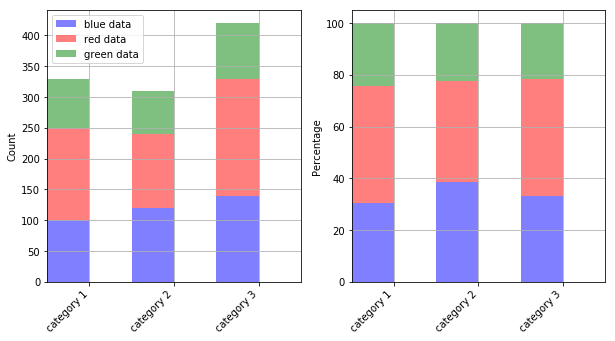

In [14]:
import matplotlib.pyplot as plt

blue_data = [100,120,140]
red_data = [150,120,190]
green_data = [80,70,90]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

bar_width = 0.5

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(blue_data))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

###################
## Absolute count
###################

ax1.bar(bar_l, blue_data, width=bar_width,
        label='blue data', alpha=0.5, color='b')
ax1.bar(bar_l, red_data, width=bar_width,
        bottom=blue_data, label='red data', alpha=0.5, color='r')
ax1.bar(bar_l, green_data, width=bar_width,
        bottom=[i+j for i,j in zip(blue_data,red_data)], label='green data', alpha=0.5, color='g')

plt.sca(ax1)
plt.xticks(tick_pos, ['category 1', 'category 2', 'category 3'])

ax1.set_ylabel("Count")
ax1.set_xlabel("")
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.grid()

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

############
## Percent
############

totals = [i+j+k for i,j,k in zip(blue_data, red_data, green_data)]
blue_rel = [i / j * 100 for  i,j in zip(blue_data, totals)]
red_rel = [i / j * 100 for  i,j in zip(red_data, totals)]
green_rel = [i / j * 100 for  i,j in zip(green_data, totals)]

ax2.bar(bar_l, blue_rel, 
        label='blue data', alpha=0.5, color='b', width=bar_width
        )
ax2.bar(bar_l, red_rel, 
        bottom=blue_rel, label='red data', alpha=0.5, color='r', width=bar_width
        )
ax2.bar(bar_l, green_rel, 
        bottom=[i+j for i,j in zip(blue_rel, red_rel)], 
        label='green data', alpha=0.5, color='g', width=bar_width
        )

plt.sca(ax2)
plt.xticks(tick_pos, ['category 1', 'category 2', 'category 3'])
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")

plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.grid()

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

# Bar plot with plot labels/text 1

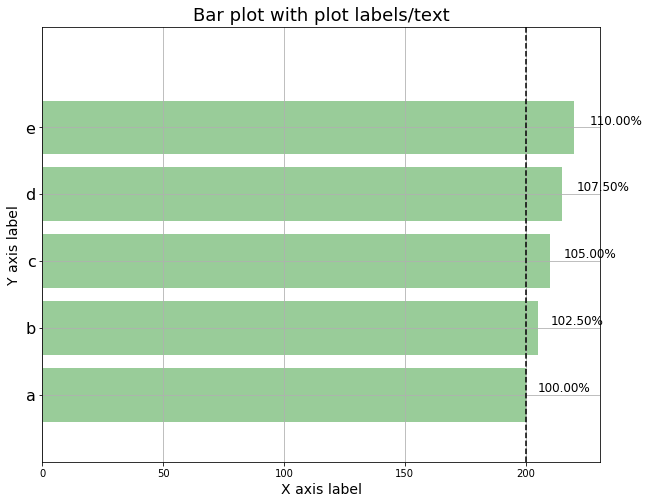

In [15]:
from matplotlib import pyplot as plt
import numpy as np

data = range(200, 225, 5)

bar_labels = ['a', 'b', 'c', 'd', 'e']

fig = plt.figure(figsize=(10,8))

# plot bars
y_pos = np.arange(len(data))
plt.yticks(y_pos, bar_labels, fontsize=16)
bars = plt.barh(y_pos, data,
         align='center', alpha=0.4, color='g')

# annotation and labels

for b,d in zip(bars, data):
    plt.text(b.get_width() + b.get_width()*0.08, b.get_y() + b.get_height()/2,
        '{0:.2%}'.format(d/min(data)), 
        ha='center', va='bottom', fontsize=12)

plt.xlabel('X axis label', fontsize=14)
plt.ylabel('Y axis label', fontsize=14)
t = plt.title('Bar plot with plot labels/text', fontsize=18)
plt.ylim([-1,len(data)+0.5])
plt.vlines(min(data), -1, len(data)+0.5, linestyles='dashed')
plt.grid()

plt.show()

# Bar plot with plot labels/text 2

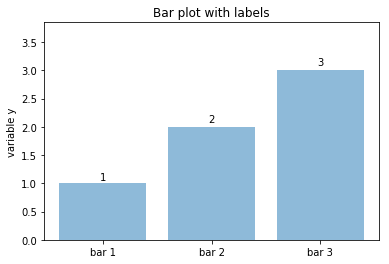

In [16]:
import matplotlib.pyplot as plt

# input data
mean_values = [1, 2, 3]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(len(bar_labels)))
rects = plt.bar(x_pos, mean_values, align='center', alpha=0.5)

# label bars
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%s'% (mean_values[ii]),
            ha='center', va='bottom')
autolabel(rects)
    


# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('variable y')
plt.xticks(x_pos, bar_labels)
plt.title('Bar plot with labels')

plt.show()

In [17]:
plt.savefig('./my_plot.png')

<Figure size 432x288 with 0 Axes>

# Barplot with auto-rotated labels and text

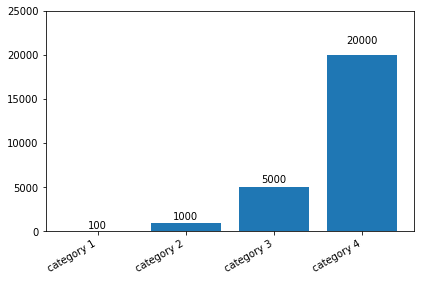

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt

idx = range(4)
values = [100, 1000, 5000, 20000]
labels = ['category 1', 'category 2',
          'category 3', 'category 4']

fig, ax = plt.subplots(1)

# Automatically align and rotate tick labels:
fig.autofmt_xdate()

bars = plt.bar(idx, values, align='center')
plt.xticks(idx, labels)
plt.tight_layout()

# Add text labels to the top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.05 * height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(bars)
plt.ylim([0, 25000])
plt.show()

# Bar plot with color gradients

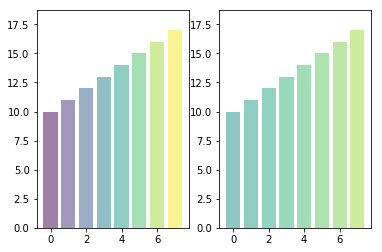

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm

# input data
mean_values = range(10,18)
x_pos = range(len(mean_values))


# create colormap
cmap1 = cm.ScalarMappable(col.Normalize(min(mean_values), max(mean_values), cm.hot))
cmap2 = cm.ScalarMappable(col.Normalize(0, 20, cm.hot))

# plot bars
plt.subplot(121)
plt.bar(x_pos, mean_values, align='center', alpha=0.5, color=cmap1.to_rgba(mean_values))
plt.ylim(0, max(mean_values) * 1.1)

plt.subplot(122)
plt.bar(x_pos, mean_values, align='center', alpha=0.5, color=cmap2.to_rgba(mean_values))
plt.ylim(0, max(mean_values) * 1.1)

plt.show()

# Bar plot pattern fill

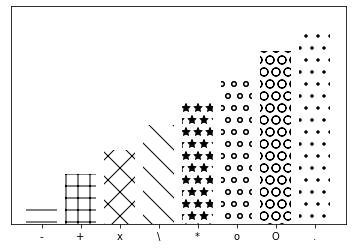

In [20]:
import matplotlib.pyplot as plt

patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')

fig = plt.gca()

# input data
mean_values = range(1, len(patterns)+1)

# plot bars
x_pos = list(range(len(mean_values)))
bars = plt.bar(x_pos, 
               mean_values, 
               align='center', 
               color='white',
               )
#set patterns
for bar, pattern in zip(bars, patterns):
     bar.set_hatch(pattern)
        

# set axes labels and formatting
fig.axes.get_yaxis().set_visible(False)        
plt.ylim([0, max(mean_values) * 1.1])
plt.xticks(x_pos, patterns)

plt.show()